## CODING QUESTIONS

#### 1) Estimate depth using the setero image pair. Show the results of varying the following parameters: blockSize [5,9,15], numDisparities [12,32,48]. You will have a totoal of 9 depth-maps, each corresponding to one combination of blockSize and numDisparities. 

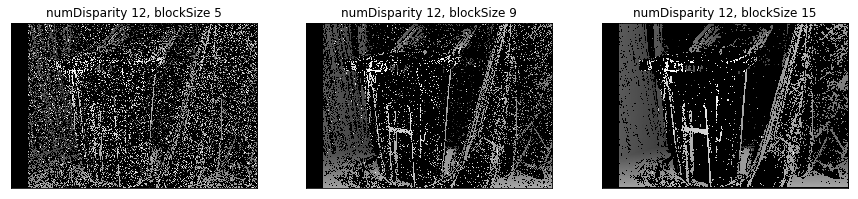

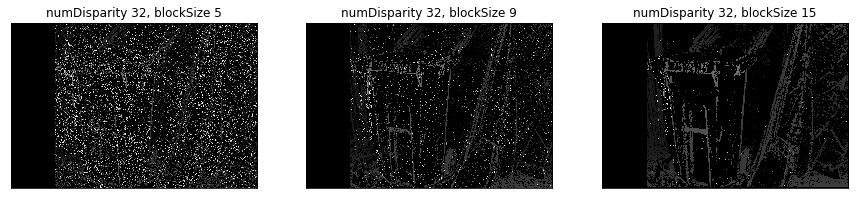

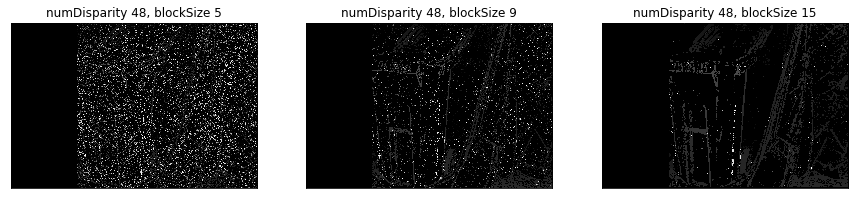

In [47]:
#imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load left and right images
imgL = cv2.imread("C:/Users/Filip/Google Drive/McGillSchool/Semester 7/ECSE 415/Assignments/Assignment3/limg.png");
imgR = cv2.imread("C:/Users/Filip/Google Drive/McGillSchool/Semester 7/ECSE 415/Assignments/Assignment3/rimg.png");

# resize images for fast processing
#imgL = cv2.resize(imgL, None, fx=0.25, fy=0.25)
#imgR = cv2.resize(imgR, None, fx=0.25, fy=0.25)

# convert to grayscale
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)


def computeDisparity(numdisp, blocksize):
    stereo = cv2.StereoBM_create(numDisparities=16*numdisp, blockSize=blocksize)
    disparity = stereo.compute(imgL_gray, imgR_gray)
    
    return disparity

img1 = computeDisparity(12,5)
img2 = computeDisparity(12,9)
img3 = computeDisparity(12,15)
img4 = computeDisparity(32,5)
img5 = computeDisparity(32,9)
img6 = computeDisparity(32,15)
img7 = computeDisparity(48,5)
img8 = computeDisparity(48,9)
img9 = computeDisparity(48,15)

# display images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img1, cmap="gray"),plt.title("numDisparity 12, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2, cmap="gray"),plt.title("numDisparity 12, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img3, cmap="gray"),plt.title("numDisparity 12, blockSize 15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img4, cmap="gray"),plt.title("numDisparity 32, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img5, cmap="gray"),plt.title("numDisparity 32, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img6, cmap="gray"),plt.title("numDisparity 32, blockSize 15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img7, cmap="gray"),plt.title("numDisparity 48, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img8, cmap="gray"),plt.title("numDisparity 48, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img9, cmap="gray"),plt.title("numDisparity 48, blockSize 15"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2) For each depth-map, compute the pixel-wise squared difference error with respect to the ground-truth.

In [ ]:
def squareDiffErr(img):
    height, width, depth = img.shape
    for row in range(0, height):
        for col in range(0, width):
        
    
    

## REASONING QUESTIONS

#### 3) Comment on error-maps for each combination of parameters. Specifically, mention the effects of varying the parameters on the error in the region of high/low texture, edge, large/small depths. 